In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import StandardScaler

plt.rcParams['figure.figsize'] = (12,6)

In [123]:
df = pd.read_csv('penguins_simple.csv', sep=';')

In [124]:
X = df.iloc[:, 1:5] / 100
y = pd.get_dummies(df['Species'])

X.isnull().sum()

Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Body Mass (g)          0
dtype: int64

In [125]:
X.columns

Index(['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)',
       'Body Mass (g)'],
      dtype='object')

In [126]:
X.shape

(333, 4)

In [127]:
trans = ColumnTransformer([
    ('categorial_imputer', MinMaxScaler(), ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)',
       'Body Mass (g)']),
    ('numeric_imputer', StandardScaler(), ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)',
       'Body Mass (g)'])
])

trans.fit(X)                    
X_t = trans.transform(X) 
X_t

array([[ 0.25454545,  0.66666667,  0.15254237, ...,  0.7807321 ,
        -1.42675157, -0.56847478],
       [ 0.26909091,  0.51190476,  0.23728814, ...,  0.11958397,
        -1.06947358, -0.50628618],
       [ 0.29818182,  0.58333333,  0.38983051, ...,  0.42472926,
        -0.42637319, -1.1903608 ],
       ...,
       [ 0.66545455,  0.30952381,  0.84745763, ..., -0.74499437,
         1.50292796,  1.91906927],
       [ 0.47636364,  0.20238095,  0.6779661 , ..., -1.20271231,
         0.78837197,  1.23499466],
       [ 0.64727273,  0.35714286,  0.69491525, ..., -0.54156417,
         0.85982757,  1.48374906]])

In [130]:
# MNIST: (60000, 28, 28) reshape to (60000, 784)

In [131]:
X_t.shape, y.shape

((333, 8), (333, 3))

In [132]:
K.clear_session() # reset your model parameters and everything

model = Sequential([
    
    Dense(10, activation='relu', input_shape=(8,)),   # hidden
    Dense(3, activation='softmax') # 3 neurons for 3 categories, softmax for multiclass(multilabel) classification
])
# TODO: try adding a Dropout layer (regularization)
# TODO: try adding a BatchNormalization layer (regularization + speedup)

In [133]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
# TODO: check how sparse_categorical_crossentropy differs
# TODO: try EarlyStopping (see course material)

In [134]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                90        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 33        
Total params: 123
Trainable params: 123
Non-trainable params: 0
_________________________________________________________________


In [135]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

#### Observations: 


    After trying other values, than the ones given at the course material, for the model's hyperparameters (batch_size to 50, epochs to 10 and learning rate to 0.2) the model seemed to perform better
    
    I also used EarlylStopping. A small explanazion about the parameters:
        Monitor can take other values depending what you want to do. There is also for ex.
        val_loss, which when used can take when more parameter the mode, that can take values of min, max or autO, so as to minimise loss or maximize accuracy.
        Patience is for the number of epochs. For example 3 here, means that aftes the model starts
        performing badly, how many epochs after it will stop.  This callback will stop the training when there is no improvement in  the loss for three consecutive epochs. This can be tricky though, since at this point where it  
        a fault and after these it could start performing good again.
        After trying other values, than the ones given at the course material, for the model's hyperparameters (batch_size to 50, epochs to 10 and learning rate to 0.2) the model seemed to perform better.

In [136]:
history = model.fit(X_t, y, batch_size=32, epochs=100, validation_split=0.3, callbacks=[callback])

Epoch 1/100
8/8 [==============================] - 1s 30ms/step - loss: 1.0559 - acc: 0.5361 - val_loss: 1.6105 - val_acc: 0.0000e+00
Epoch 2/100
8/8 [==============================] - 0s 8ms/step - loss: 1.0042 - acc: 0.5654 - val_loss: 1.5669 - val_acc: 0.0000e+00
Epoch 3/100
8/8 [==============================] - 0s 7ms/step - loss: 0.9526 - acc: 0.6154 - val_loss: 1.5228 - val_acc: 0.0000e+00
Epoch 4/100
8/8 [==============================] - 0s 7ms/step - loss: 0.9233 - acc: 0.6232 - val_loss: 1.4750 - val_acc: 0.0000e+00
Epoch 5/100
8/8 [==============================] - 0s 7ms/step - loss: 0.8998 - acc: 0.6047 - val_loss: 1.4255 - val_acc: 0.0000e+00
Epoch 6/100
8/8 [==============================] - 0s 7ms/step - loss: 0.8511 - acc: 0.6180 - val_loss: 1.3879 - val_acc: 0.0000e+00
Epoch 7/100
8/8 [==============================] - 0s 7ms/step - loss: 0.8192 - acc: 0.6364 - val_loss: 1.3469 - val_acc: 0.0000e+00
Epoch 8/100
8/8 [==============================] - 0s 7ms/step - los

Epoch 64/100
8/8 [==============================] - 0s 7ms/step - loss: 0.1261 - acc: 0.9790 - val_loss: 0.1193 - val_acc: 1.0000
Epoch 65/100
8/8 [==============================] - 0s 6ms/step - loss: 0.1213 - acc: 0.9769 - val_loss: 0.1158 - val_acc: 1.0000
Epoch 66/100
8/8 [==============================] - 0s 7ms/step - loss: 0.1165 - acc: 0.9889 - val_loss: 0.1121 - val_acc: 1.0000
Epoch 67/100
8/8 [==============================] - 0s 7ms/step - loss: 0.1269 - acc: 0.9696 - val_loss: 0.1087 - val_acc: 1.0000
Epoch 68/100
8/8 [==============================] - 0s 6ms/step - loss: 0.1405 - acc: 0.9629 - val_loss: 0.1052 - val_acc: 1.0000
Epoch 69/100
8/8 [==============================] - 0s 7ms/step - loss: 0.1017 - acc: 0.9863 - val_loss: 0.1009 - val_acc: 1.0000
Epoch 70/100
8/8 [==============================] - 0s 7ms/step - loss: 0.1093 - acc: 0.9777 - val_loss: 0.0974 - val_acc: 1.0000
Epoch 71/100
8/8 [==============================] - 0s 7ms/step - loss: 0.1034 - acc: 0.98

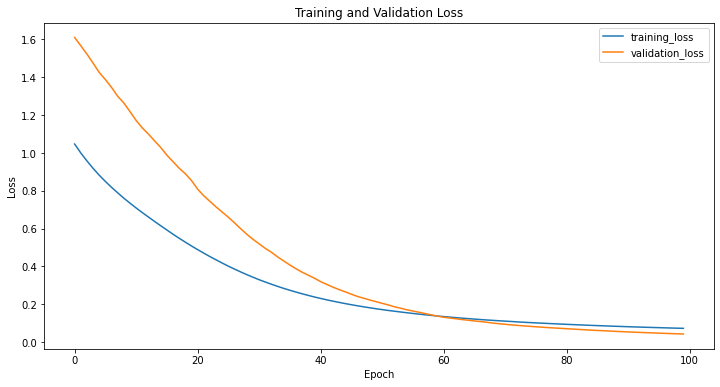

In [137]:
plt.plot(history.history['loss'], label='training_loss')
plt.plot(history.history['val_loss'], label='validation_loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

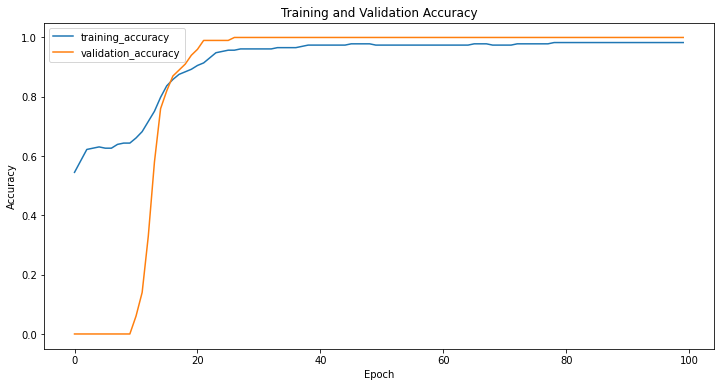

In [138]:
plt.plot(history.history['acc'], label='training_accuracy')
plt.plot(history.history['val_acc'], label='validation_accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [139]:
# Evaluate the model
model.evaluate(X_t, y)

11/11 [==============================] - 0s 873us/step - loss: 0.0636 - acc: 0.9880


[0.06360210478305817, 0.9879879951477051]

In [140]:
# Look at the first 10 predictions
model.predict(X_t)[:10]

array([[9.87927258e-01, 1.06278295e-02, 1.44492916e-03],
       [9.64352787e-01, 2.90716346e-02, 6.57562446e-03],
       [8.92261863e-01, 1.04098290e-01, 3.63984820e-03],
       [9.91425157e-01, 8.10498279e-03, 4.69766004e-04],
       [9.92849708e-01, 6.85625384e-03, 2.93959311e-04],
       [9.77452874e-01, 1.97388530e-02, 2.80829053e-03],
       [9.86483514e-01, 1.00939237e-02, 3.42257624e-03],
       [7.49139488e-01, 2.45544508e-01, 5.31595945e-03],
       [9.94967282e-01, 4.83952882e-03, 1.93183529e-04],
       [9.96921182e-01, 2.78704404e-03, 2.91806151e-04]], dtype=float32)

In [75]:
 print(h.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


In [78]:
keys = h.history.keys()

In [79]:
for key in keys:
    print (key)

loss
acc
val_loss
val_acc


<b> WEIGHTS </b>

In [85]:
model.get_weights()

[array([[-0.2021342 , -0.52398956, -0.39456084, -0.03405682,  0.88415927,
         -0.14573385, -0.35100287, -0.12934543,  0.7743712 , -0.2769007 ],
        [-0.1795314 ,  0.28073975,  0.12213817, -0.42209756,  0.2780948 ,
          0.33031613,  0.38943765,  0.10365221,  0.80225134, -0.5053686 ],
        [-0.23064572,  0.8197238 ,  0.41905284, -0.08424684, -0.19763748,
          0.7226037 , -0.07232069,  0.08506066, -0.17006712,  0.29559505],
        [ 0.60055745,  0.46431428, -0.64535975, -0.4719543 , -0.09545835,
          0.1262844 , -0.04551539, -0.12319717,  0.7037154 ,  0.21726388],
        [-0.27170444, -0.81607866, -0.07898765,  0.23190685,  0.5298667 ,
          0.8688656 ,  0.3009411 ,  0.40475565, -0.352946  , -0.0640467 ],
        [ 0.3498691 ,  0.42720047,  0.05672726,  0.03536846, -0.4524389 ,
          0.16529377, -0.60469955, -0.7585782 ,  0.6487256 ,  0.00132135],
        [-0.642278  , -0.05845499,  0.15685424,  0.38728297,  0.40904832,
         -0.02674877,  0.1730233

In [81]:
# Inspect the weights of the Neural Network
model.get_weights()[0] #input weights

array([[-0.2021342 , -0.52398956, -0.39456084, -0.03405682,  0.88415927,
        -0.14573385, -0.35100287, -0.12934543,  0.7743712 , -0.2769007 ],
       [-0.1795314 ,  0.28073975,  0.12213817, -0.42209756,  0.2780948 ,
         0.33031613,  0.38943765,  0.10365221,  0.80225134, -0.5053686 ],
       [-0.23064572,  0.8197238 ,  0.41905284, -0.08424684, -0.19763748,
         0.7226037 , -0.07232069,  0.08506066, -0.17006712,  0.29559505],
       [ 0.60055745,  0.46431428, -0.64535975, -0.4719543 , -0.09545835,
         0.1262844 , -0.04551539, -0.12319717,  0.7037154 ,  0.21726388],
       [-0.27170444, -0.81607866, -0.07898765,  0.23190685,  0.5298667 ,
         0.8688656 ,  0.3009411 ,  0.40475565, -0.352946  , -0.0640467 ],
       [ 0.3498691 ,  0.42720047,  0.05672726,  0.03536846, -0.4524389 ,
         0.16529377, -0.60469955, -0.7585782 ,  0.6487256 ,  0.00132135],
       [-0.642278  , -0.05845499,  0.15685424,  0.38728297,  0.40904832,
        -0.02674877,  0.17302333,  0.573876  

In [82]:
model.get_weights()[1] #input weights

array([ 0.20176019,  0.24208458, -0.13728085, -0.14883731,  0.3722174 ,
        0.311629  ,  0.0914636 ,  0.16857322,  0.27169004, -0.06238016],
      dtype=float32)

In [83]:
model.get_weights() # output weights

[array([[-0.2021342 , -0.52398956, -0.39456084, -0.03405682,  0.88415927,
         -0.14573385, -0.35100287, -0.12934543,  0.7743712 , -0.2769007 ],
        [-0.1795314 ,  0.28073975,  0.12213817, -0.42209756,  0.2780948 ,
          0.33031613,  0.38943765,  0.10365221,  0.80225134, -0.5053686 ],
        [-0.23064572,  0.8197238 ,  0.41905284, -0.08424684, -0.19763748,
          0.7226037 , -0.07232069,  0.08506066, -0.17006712,  0.29559505],
        [ 0.60055745,  0.46431428, -0.64535975, -0.4719543 , -0.09545835,
          0.1262844 , -0.04551539, -0.12319717,  0.7037154 ,  0.21726388],
        [-0.27170444, -0.81607866, -0.07898765,  0.23190685,  0.5298667 ,
          0.8688656 ,  0.3009411 ,  0.40475565, -0.352946  , -0.0640467 ],
        [ 0.3498691 ,  0.42720047,  0.05672726,  0.03536846, -0.4524389 ,
          0.16529377, -0.60469955, -0.7585782 ,  0.6487256 ,  0.00132135],
        [-0.642278  , -0.05845499,  0.15685424,  0.38728297,  0.40904832,
         -0.02674877,  0.1730233

In [84]:
model.get_weights()[3] # output bias

array([ 0.04626906,  0.12644413, -0.2362276 ], dtype=float32)